# Simple Logistic Regression Implementation using Scikit-Learn

Keywords: Precision, recall, f1 score, accuray, roc, auc

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
print(data.DESCR)
print(data.feature_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
print(df.describe())
print(df.shape)


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [14]:

df.columns[df.isnull().sum() != 0]

Index([], dtype='object')

<Axes: title={'center': 'Correlation with target'}>

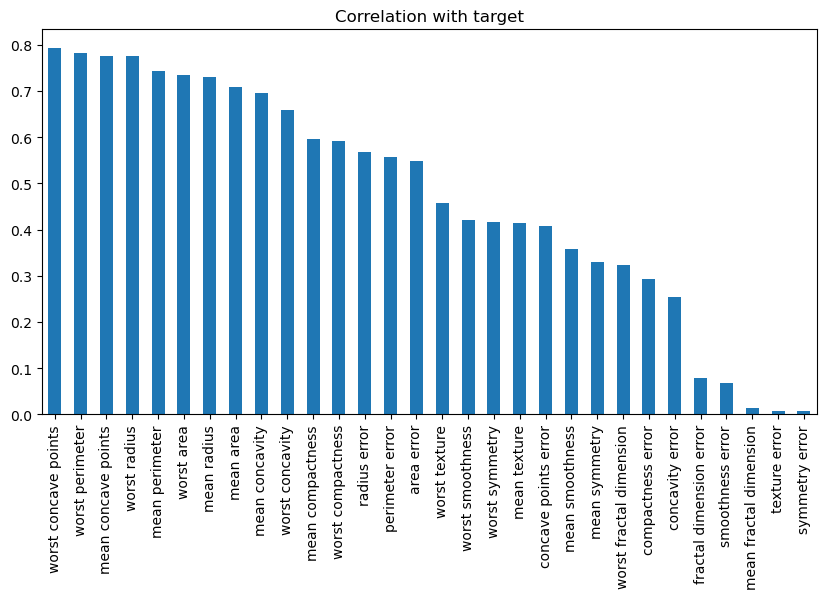

In [19]:
df.corr()["target"].abs().sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10, 5), title='Correlation with target')

In [20]:
print(df['target'].value_counts()) 

target
1    357
0    212
Name: count, dtype: int64


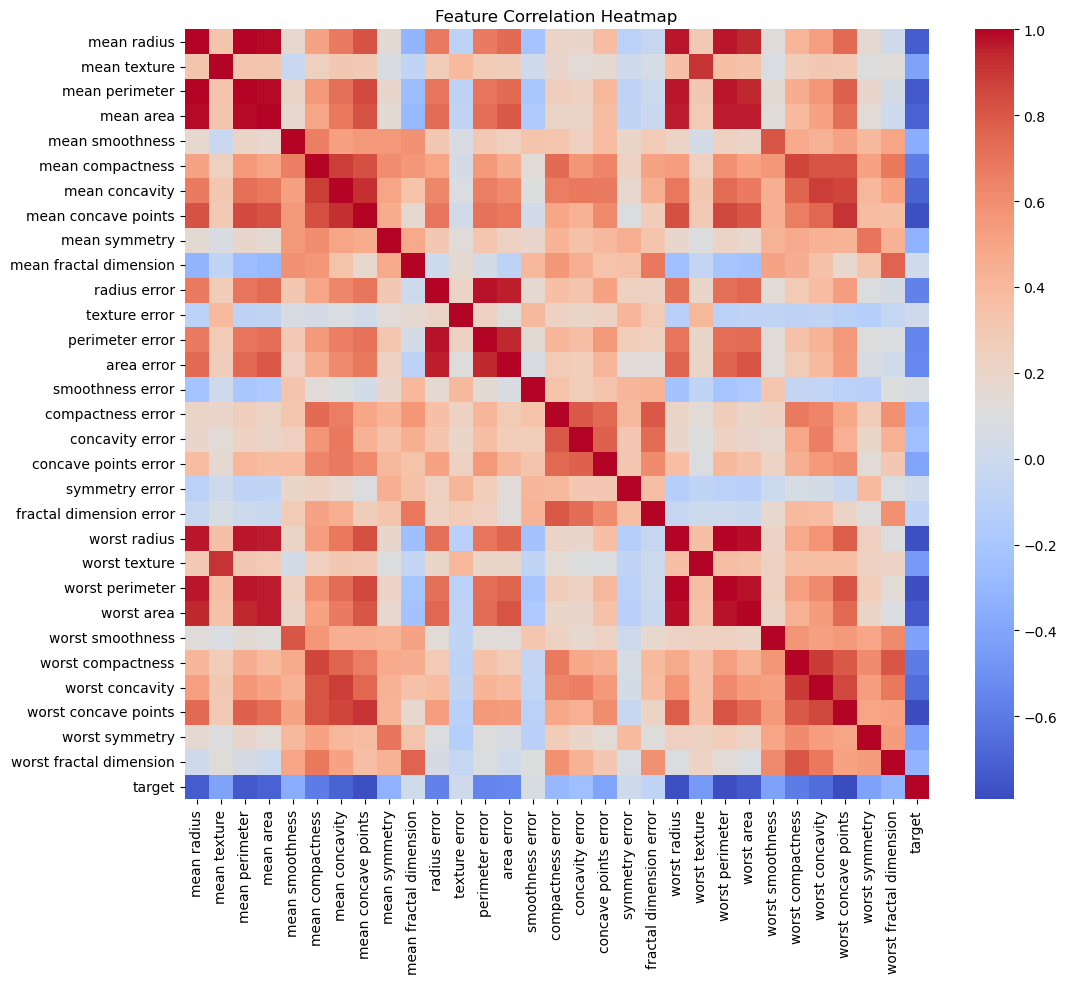

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# logistic regression uses gradient descent
# features withh large ranges dominate

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [25]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [33]:
y_pred, y_test

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0]),
 204    1
 70     0
 131    0
 431    1
 540    1
       ..
 486    1
 75     0
 249    1
 238    1
 265    0
 Name: target, Length: 114, dtype: int64)

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted_Prob': y_prob
})

print(comparison_df.head()) 


     Actual  Predicted  Predicted_Prob
204       1          1        0.886410
70        0          0        0.000009
131       0          0        0.003079
431       1          1        0.999490
540       1          1        0.999939


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# accuracy correct/total
# precision true positive / predicted as positive
# recall true positive / actual positive
# f1 score harmonic mean of precision and recall


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


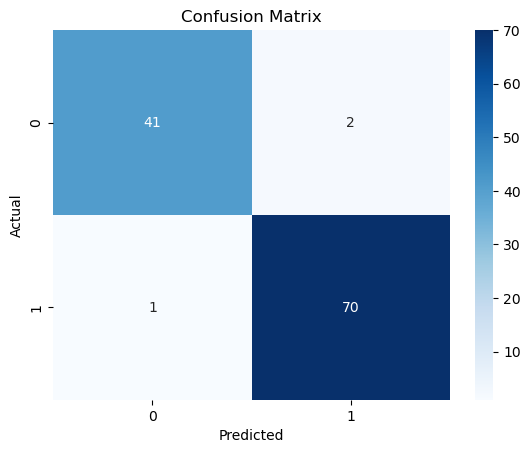

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()


For each threshold we can choose, we get a different confusion matrix, and it can be a hassle.
So we instead calculate the roc.
Receiver Characteristic Curve (ROC) graphs provide a simple way to summarize all the information.

True positive rate (TPR) (recall, out of all positives how many classified as positive) is Sensitivity
False positive rate (FPR) (out of all negatives how many we classified as positive) is 1 - Specificity = FP / (FP + TN)

AUC makes it easier to compare one ROC curve to another.
If a roc curve for logistic regression gave a higher auc compared to roc curve for a random forest you can say that the logistic regression model is better than the random forest model.

Can replace FPR with Precision.

 

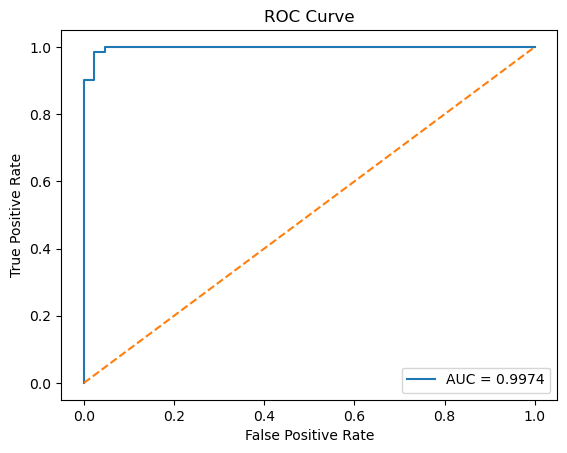

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Either choose according to your needs, or can you Youden's J statistic, which is TPR - FPR. Maximise this number.

In [ ]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# if positive increase change of being benign (1) and if negative increase change of being malignant (0)

for feat, coef in zip(X.columns, coefficients):
    print(f"{feat:30s}: {coef:.4f}")
print(f"\nIntercept (bias): {intercept:.4f}")

mean radius                   : -0.4319
mean texture                  : -0.3873
mean perimeter                : -0.3934
mean area                     : -0.4652
mean smoothness               : -0.0717
mean compactness              : 0.5402
mean concavity                : -0.8015
mean concave points           : -1.1198
mean symmetry                 : 0.2361
mean fractal dimension        : 0.0759
radius error                  : -1.2682
texture error                 : 0.1889
perimeter error               : -0.6106
area error                    : -0.9072
smoothness error              : -0.3133
compactness error             : 0.6825
concavity error               : 0.1753
concave points error          : -0.3113
symmetry error                : 0.5004
fractal dimension error       : 0.6162
worst radius                  : -0.8798
worst texture                 : -1.3506
worst perimeter               : -0.5895
worst area                    : -0.8418
worst smoothness              : -0.5442
worst co

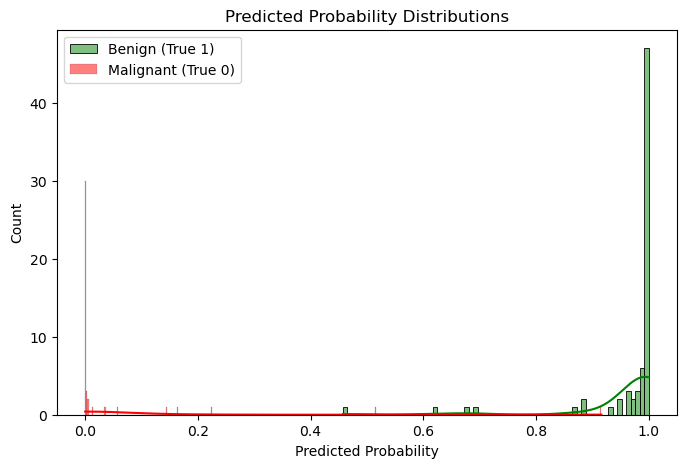

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(y_prob[y_test == 1], label='Benign (True 1)', color='green', kde=True)
sns.histplot(y_prob[y_test == 0], label='Malignant (True 0)', color='red', kde=True)
plt.xlabel('Predicted Probability')
plt.title('Predicted Probability Distributions')
plt.legend()
plt.show()